In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

**Step 1: Load and Inspect the Dataset**

In [2]:
# Load dataset
df = pd.read_csv('/content/zomato.csv')

In [3]:
# Display first few rows
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-07-23  116.000000  138.899994  115.000000  126.000000  126.000000   
1  2021-07-26  126.349998  143.750000  125.300003  140.649994  140.649994   
2  2021-07-27  141.699997  147.800003  127.750000  132.899994  132.899994   
3  2021-07-28  131.000000  135.000000  123.550003  131.199997  131.199997   
4  2021-07-29  134.949997  144.000000  132.199997  141.550003  141.550003   

      Volume  
0  694895290  
1  249723854  
2  240341900  
3  159793731  
4  117973089  


In [4]:
# Display basic statistics
print(df.describe())

             Open        High         Low       Close   Adj Close  \
count  631.000000  631.000000  631.000000  631.000000  631.000000   
mean    90.011252   91.835737   87.868304   89.707686   89.707686   
std     32.757639   33.319545   31.900849   32.621900   32.621900   
min     40.849998   44.400002   40.599998   41.650002   41.650002   
25%     62.549999   63.450001   61.125000   62.074998   62.074998   
50%     80.000000   81.000000   78.099998   79.699997   79.699997   
75%    124.474998  126.750000  121.525002  124.599998  124.599998   
max    161.149994  169.000000  154.250000  160.300003  160.300003   

             Volume  
count  6.310000e+02  
mean   6.731737e+07  
std    7.461030e+07  
min    0.000000e+00  
25%    2.800788e+07  
50%    4.759710e+07  
75%    7.525439e+07  
max    6.948953e+08  


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       631 non-null    object 
 1   Open       631 non-null    float64
 2   High       631 non-null    float64
 3   Low        631 non-null    float64
 4   Close      631 non-null    float64
 5   Adj Close  631 non-null    float64
 6   Volume     631 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 34.6+ KB


In [8]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
626,2024-02-01,141.000000,143.500000,138.550003,140.550003,140.550003,70252449
627,2024-02-02,141.800003,145.000000,141.449997,143.800003,143.800003,78666454
628,2024-02-05,145.000000,145.399994,138.250000,140.250000,140.250000,54189688
629,2024-02-06,140.399994,141.800003,138.050003,139.949997,139.949997,46782951
630,2024-02-07,141.000000,142.899994,139.649994,140.399994,140.399994,75083259


In [10]:
df.shape

(631, 7)

**Step 2: Exploratory Data Analysis (EDA)**

In [11]:
# Check for missing values
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


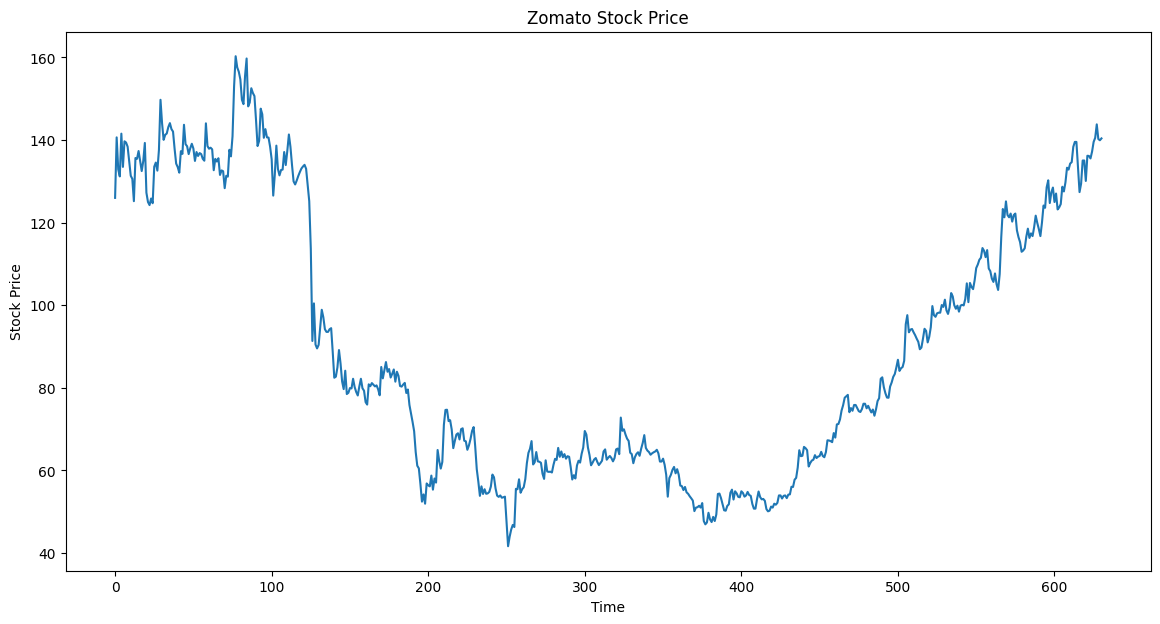

In [12]:
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close'])
plt.title('Zomato Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [13]:
# Data Preprocessing for all models
# Filling missing values (if any)
df.fillna(method='ffill', inplace=True)

In [14]:
# Feature selection and scaling
X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

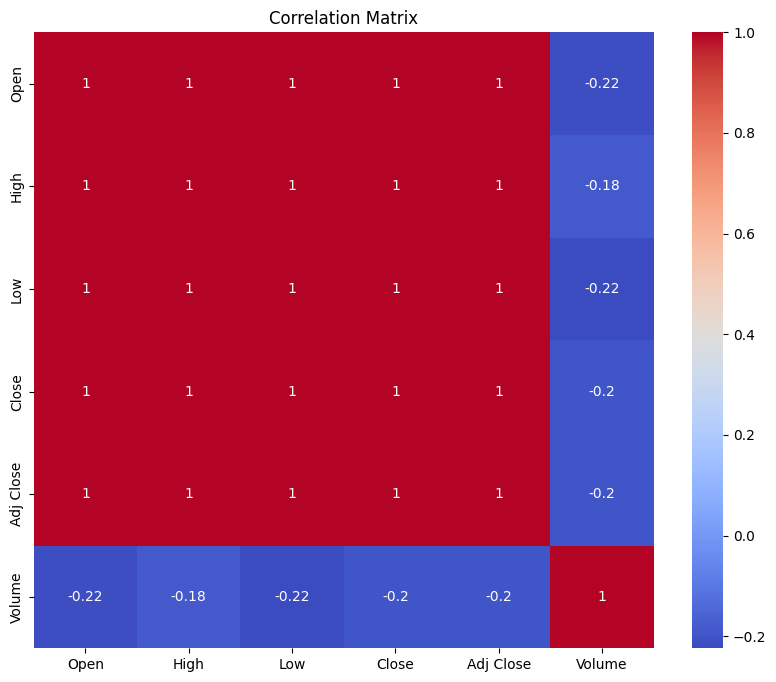

In [15]:
# Select only numeric columns before calculating the correlation
numeric_df = df.select_dtypes(include=['number'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

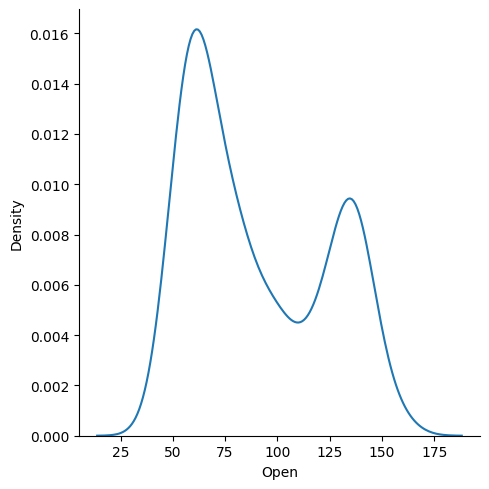

In [24]:
#Open Stock Price According to their density
sns.displot(df["Open"], kind="kde")

<Axes: xlabel='Adj Close', ylabel='High'>

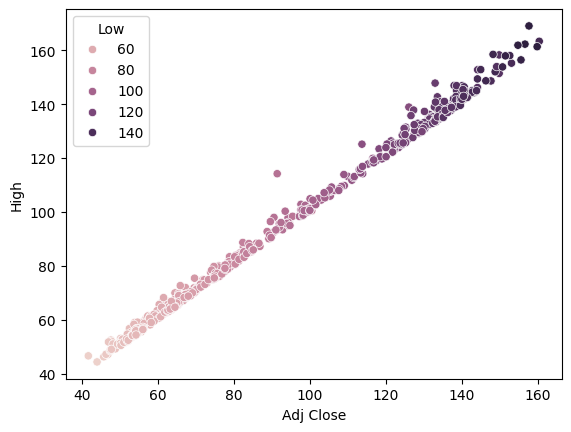

In [25]:
# About The Adj Close , High and low Stock prices
sns.scatterplot(x="Adj Close",y="High",hue="Low",data=df)

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

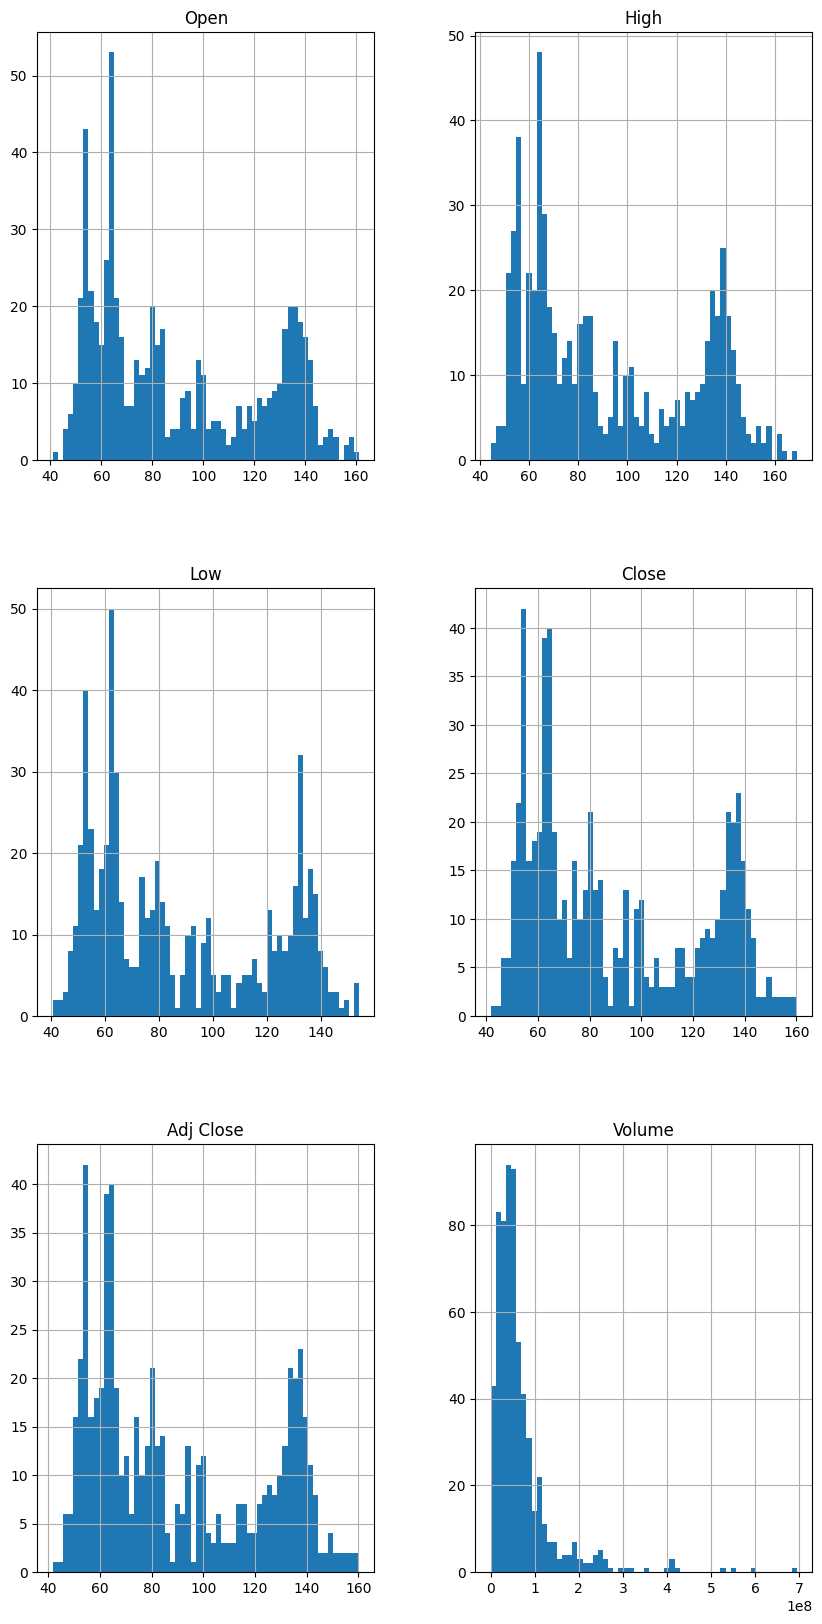

In [18]:
#Make Histogram of All Data set

df.hist(bins=60,figsize=(10,20))

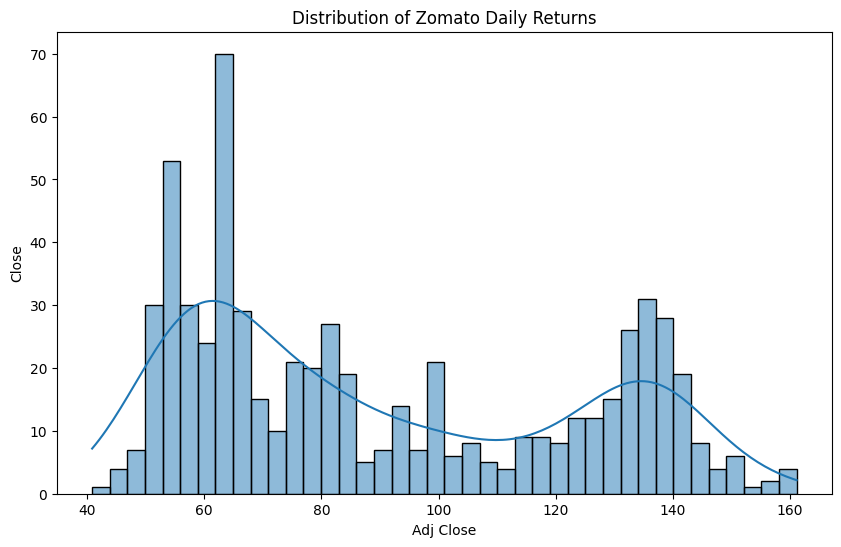

In [26]:
# This Plotation on Stock prices When on Close , Adjacent Close and on Open Stages .

plt.figure(figsize=(10, 6))
sns.histplot(df['Open'].dropna(), bins=40, kde=True)
plt.title('Distribution of Zomato Daily Returns')
plt.xlabel('Adj Close')
plt.ylabel('Close')
plt.show()

In [27]:
# Plot Zomato High Stock Prices

def volume_analysis(df,cmp_name):
    df['High'].plot(figsize=(10,7),title='Zomato '+cmp_name+' Stock Prices',c='orange')
    plt.ylabel('Volume')
    plt.show()

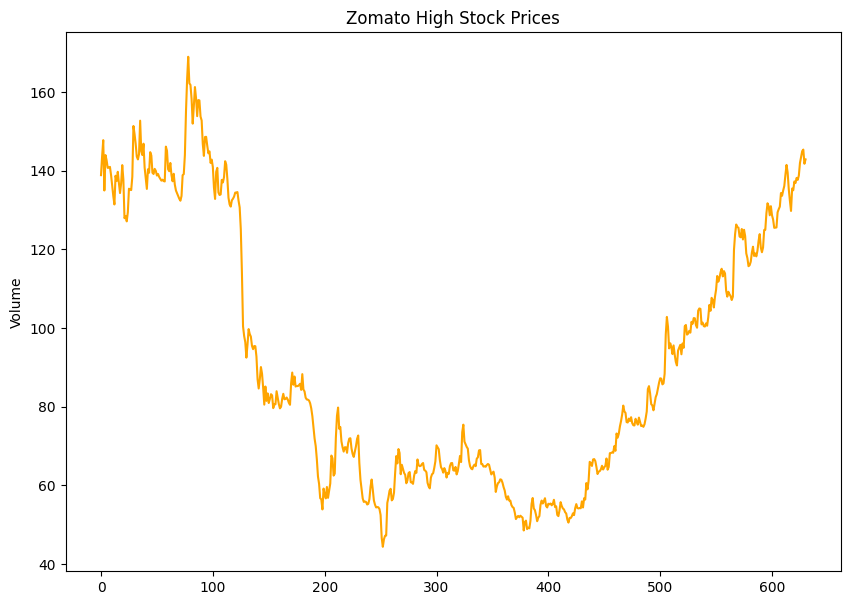

In [28]:
volume_analysis(df,'High')

**Step 3: split the dataset into training and testing sets**

In [29]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
# Defining a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f'MSE: {mse}')
    print(f'R2 Score: {r2}')
    return predictions

**Step 4: Comparing and Predicting with differnt Models**

**SVM Model**

In [31]:
svm_model = SVR()
svm_model.fit(X_train, y_train)

SVR()

In [32]:
print("SVM Model Evaluation:")
svm_predictions = evaluate_model(svm_model, X_test, y_test)

SVM Model Evaluation:
MSE: 58.466660895466475
R2 Score: 0.9479335576452029


**SGD Model**

In [33]:
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train, y_train)

SGDRegressor()

In [34]:
print("SGD Model Evaluation:")
sgd_predictions = evaluate_model(sgd_model, X_test, y_test)

SGD Model Evaluation:
MSE: 3.7231956951484966
R2 Score: 0.9966843744611366


**KNN Model**

In [35]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [36]:
print("KNN Model Evaluation:")
knn_predictions = evaluate_model(knn_model, X_test, y_test)

KNN Model Evaluation:
MSE: 10.452641661645151
R2 Score: 0.9906915863468851


**Decision Tree Regressor Model**

In [37]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
print("Decision Tree Regressor Model Evaluation:")
dt_predictions = evaluate_model(dt_model, X_test, y_test)

Decision Tree Regressor Model Evaluation:
MSE: 5.0008110149753975
R2 Score: 0.9955466169189313


**LSTM Model**

In [40]:
X_lstm = df[['Open', 'High', 'Low', 'Volume', 'Close']]
scaler_lstm = StandardScaler()

In [41]:
X_lstm_scaled = scaler_lstm.fit_transform(X_lstm)

**Splitting into training and testing for LSTM**

In [42]:
train_size = int(len(X_lstm_scaled) * 0.8)
train_data, test_data = X_lstm_scaled[:train_size], X_lstm_scaled[train_size:]

In [43]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), :]
        X.append(a)
        y.append(data[i + time_step, -1])
    return np.array(X), np.array(y)

In [44]:
time_step = 10
X_train_lstm, y_train_lstm = create_dataset(train_data, time_step)
X_test_lstm, y_test_lstm = create_dataset(test_data, time_step)

**Reshape data for LSTM**

In [45]:
X_train_lstm = X_train_lstm.reshape(X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2])
X_test_lstm = X_test_lstm.reshape(X_test_lstm.shape[0], X_test_lstm.shape[1], X_test_lstm.shape[2])

In [46]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train_lstm.shape[2])))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train_lstm, y_train_lstm, batch_size=1, epochs=1)

493/493 [==============================] - 10s 11ms/step - loss: 0.0546


**LSTM Model Evaluation**

In [47]:
print("LSTM Model Evaluation:")
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = scaler_lstm.inverse_transform(np.concatenate((np.zeros((lstm_predictions.shape[0], X_lstm_scaled.shape[1] - 1)), lstm_predictions), axis=1))[:, -1]
y_test_lstm = scaler_lstm.inverse_transform(np.concatenate((np.zeros((y_test_lstm.shape[0], X_lstm_scaled.shape[1] - 1)), y_test_lstm.reshape(-1, 1)), axis=1))[:, -1]
mse_lstm = mean_squared_error(y_test_lstm, lstm_predictions)
r2_lstm = r2_score(y_test_lstm, lstm_predictions)
print(f'MSE: {mse_lstm}')
print(f'R2 Score: {r2_lstm}')

LSTM Model Evaluation:
4/4 [==============================] - 2s 9ms/step
MSE: 18.80870910725298
R2 Score: 0.9076286005404447


**Visualising the Results**

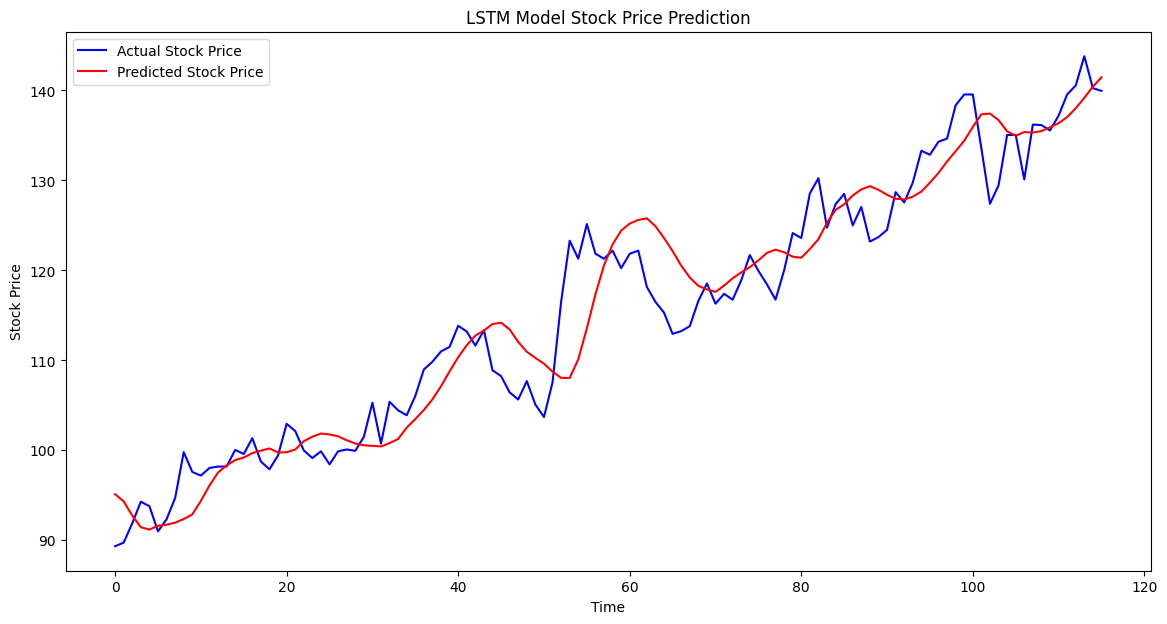

In [48]:
# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(y_test_lstm, color='blue', label='Actual Stock Price')
plt.plot(lstm_predictions, color='red', label='Predicted Stock Price')
plt.title('LSTM Model Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()